<a href="https://colab.research.google.com/github/rajgupt/dl-notebooks/blob/main/pytorch/2_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
training_data[0][0].shape, training_data[0][1]

(torch.Size([1, 28, 28]), 9)

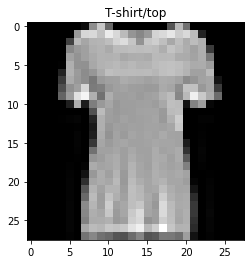

In [17]:
idx = 10
plt.title(training_data.classes[training_data[idx][1]])
plt.imshow(training_data[idx][0].squeeze(),cmap='gray')

In [18]:
from torch.utils.data import DataLoader

In [19]:
# load and manage data as a batch using data loader
train_dl = DataLoader(training_data,batch_size=64,shuffle=True)

In [25]:
train_features, train_labels = next(iter(train_dl))

In [26]:
print(train_labels[:4])
train_features.size(), train_labels.size()

tensor([4, 4, 3, 4])


(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Use target transform to create one-hot target

In [28]:
from torchvision.transforms import Lambda

In [29]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [30]:
ds[0][1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])